Logistic Regression is one of most important techniques in data science. It is usually used to solve the classic classification problem.

# What is different between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it isn’t the best tool for predicting the class of an observed data point. In order to estimate a classification, we need some sort of guidance on what would be the most probable class for that data point. For this, we use Logistic Regression.

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic regression, it is actually a probabilistic classification model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

ProbabilityOfaClass=θ(y)=ey1+ey=exp(y)/(1+exp(y))=p
 
which produces p-values between 0 (as y approaches minus infinity) and 1 (as y approaches plus infinity). This now becomes a special kind of non-linear regression.

In this equation, y is the regression result (the sum of the variables weighted by the coefficients), exp is the exponential function and  θ(y) is the logistic function, also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modelling population growth.

You might also have seen this function before, in another configuration:

ProbabilityOfaClass=θ(y)=11+e−x
 
So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

# BY using Logistic Regression in Tensorflow

Utilizing Logistic Regression in TensorFlow
For us to utilize Logistic Regression in TensorFlow, we first need to import whatever libraries we are going to use. To do so, you can run the code cell below.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\Users\saira\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
## now load the dataset
iris = load_iris()
#print(iris)

In [76]:
iris_x, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trianY, testY = train_test_split(iris_x, iris_y, test_size = 0.33, random_state = 42)

In [77]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trianY.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

In [78]:
w = tf.Variable(tf.zeros([4,3])) #   4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3- dimensional output [0,0,1], [0,0,1], [1,0,0]

In [79]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures, numLabels],
                                      mean = 0,
                                      stddev = 0.01,
                                      name = "weights"))
bias = tf.Variable(tf.random_normal([1,numLabels],
                                   mean = 0, stddev = 0.01,
                                   name = "bias"))

# Logistic Regression Model

We now define our operations in order to properly run the Logistic Regression. Logistic regression is typically thought of as a single equation:

ŷ =sigmoid(WX+b)
 
However, for the sake of clarity, we can have it broken into its three main components:

a weight times features matrix multiplication operation,
a summation of the weighted features and a bias term,
and finally the application of a sigmoid function.
As such, you will find these components defined as three separate operations below.

In [80]:
apply_weights_OP = tf.matmul(X, weights, name = "apply_weights")
add_bias_OP = tf.add(apply_weights_op, bias, name = "apply_bias")
activation_OP = tf.nn.sigmoid(add_bias_op, name ="activation")

Training
The learning algorithm is how we search for the best weight vector ( w ). This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure.

What tell us our model is bad?

The Cost or Loss of the model, so what we want is to minimize that.

What is the cost function in our model?

The cost function we are going to utilize is the Squared Mean Error loss function.

How to minimize the cost function?

We can't use least-squares linear regression here, so we will use gradient descent instead. Specifically, we will use batch gradient descent which calculates the gradient from all data points in the data set.

Cost function

Before defining our cost function, we need to define how long we are going to train and how should we define the learning rate.

In [81]:
## number of epochs in our training
numEpochs = 700
## defining the learning rate iterations  (decay)
learningRate = tf.train.exponential_decay( learning_rate = 0.0008,
                                             global_step = 1,
                                             decay_steps = trainX.shape[0],
                                             decay_rate = 0.95,
                                             staircase = True)

In [82]:
## definhg the cos t function -squared mean error
cost_op = tf.nn.l2_loss(activation_OP -yGold, name ="squared_error_cost")
## defining the gradient descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_op)

In [83]:
## creating tenssorfloe session 
sess = tf.Session()
init_OP = tf.global_variables_initializer()
sess.run(init_OP)

In [84]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_Prediction_OP = tf.equal(tf.argmax(activation_OP, 1), tf.argmax(yGold,1))

In [85]:
# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_Prediction_OP, "float"))

In [86]:
# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)


In [87]:
## summary op for accuracy 
accuracy_summary_OP = tf.summary.scalar("accuray", accuracy_OP)

In [88]:
## summary OP for cost
cost_summary_OP = tf.summary.scalar("cost", cost_op)

In [89]:
# Summary ops to check how variables (W, b) are updating after each iteration
#weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
#biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [90]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

In [93]:
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
else:
    # Run training step
    step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
    # Report occasional stats
    if i % 10 == 0:
        # Add epoch to epoch_values
        epoch_values.append(i)
        # Generate accuracy stats on test data
        train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trianY})
        # Add accuracy to live graphing variable
        accuracy_values.append(train_accuracy)
        # Add cost to live graphing variable
        cost_values.append(newCost)
        # Re-assign values for variables
        diff = abs(newCost - cost)
        cost = newCost

NameError: name 'trainY' is not defined

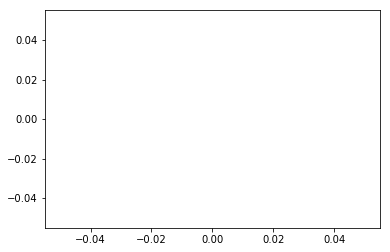

In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()